# NeuroReinforcer - Reinforcement Learning Example

The most common Python framework for reinforcement learning is the `gym` environment. Consequently, the example detailed below will be designed for the `gym` environment.

In [1]:
import EvolutionaryComputation.NeuroEvolution as ne

In [2]:
import numpy as np
import gym

# LunarLander-v2 

The LunarLandar-v2 `gym` environment is a simple numerical input reinforcement learning problem where the goal is to balance a lunar landar onto a landing pad using thrusters. More information about the problem can be found on the `gym` environment website: [LunarLander-v2](https://gym.openai.com/envs/LunarLander-v2/). The maximum fitness/reward value is 200; our goal is to evolve the weights of a neural network to achieve this value.

In [3]:
# first define the fitness function, which takes in the generation
# print-out is used for printing out the gui for the example, kept on false
# to speed up training
def fitness_function(gen, print_out=False):
    env = gym.make("LunarLander-v2")
    fit = []  # fitness for generation
    max_game_count = 6  # number of games played per individual
    max_step = 200  # maximum frame count
    for ind in gen:  # for each individual in generation
        score = []  # fitness score for all individuals
        for j in range(0, max_game_count):
            local_score = 0  # fitness score for individual
            next_state = env.reset()  # resent environment
            for k in range(0, max_step):  
                if print_out:  
                    env.render()  # print out render
                
                # predict the next state for the individual
                # output is softmax so take index of max value
                action = np.argmax(ind.predict(next_state))
                
                next_state, reward, done, info = env.step(action) 
                local_score += reward
                if done:
                    break
                    
            score.append(local_score)
            
        # take median of scores from each game   
        fit.append(np.median(score))  # median is resistant to outliers
    return np.asarray(fit)  

To solve the problem, we will employ a three hidden layer feed forward neural network with 50, 100, and 50 hidden nodes in that order. Because the output is one of four possible states, the softmax activation function will be used to create a probability distribution. The input is a list of eight inputs. 

In [4]:
layer_nodes=[50, 100, 50]
num_input = 8
num_output = 4
fitness_function = fitness_function
population_size = 50
output_activation = 'softmax'
max_epochs = 200

# Speciation Algorithm

The speciation algorithm allows for the algorithm to choose the best activation architecture for the given problem. There exist two different versions - mixed layer activations and complete layer activations. For both versions there exists an option to mutate the species of an individual to another, either extinct or living. This mechanism introduces variance into the algorithm by allowing new species to be introduced that might have been eliminated prematurely. For this example, there will be a $5$% chance of mutating the species. In this way, with a population size of 50 and max epochs of 200, $50*200=10000*0.05=500$ we expect $500$ species changes along the way. 

## Just Layers - Activations are same for all layers

In [8]:
# define the choices for complete layer activations
activation_function = ['relu', 'leaky_relu', 'selu', 'elu', 'gaussian', 'sigmoid', 'tanh']

# define the model
model = ne.NeuroReinforcer(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                          fitness_function=fitness_function, population_size=population_size,
                          output_activation=output_activation, 
                          activation_function=activation_function)

model.evolve(max_epoch=max_epochs, verbose=True, warm_start=False, 
             just_layers=True, algorithm='speciation', prob_chnge_species=0.05)

Number of Trainable Parameters Per Network: 10801
Epoch 1/200
  Best Fit: -109.1066383727334 Mean Fit: -457.1410045057829
  Number of Species Present: 7
    Best Species by Top Fit: ['gaussian', 'gaussian', 'gaussian']
    Species: [relu,relu,relu] Count: 4
    Species: [leaky_relu,leaky_relu,leaky_relu] Count: 7
    Species: [selu,selu,selu] Count: 8
    Species: [elu,elu,elu] Count: 8
    Species: [gaussian,gaussian,gaussian] Count: 7
    Species: [sigmoid,sigmoid,sigmoid] Count: 8
    Species: [tanh,tanh,tanh] Count: 7
     Change from Species ['sigmoid', 'sigmoid', 'sigmoid'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
     Change from Species ['tanh', 'tanh', 'tanh'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
     Change from Species ['elu', 'elu', 'elu'] to Species ['relu', 'relu', 'relu']
Epoch 2/200
  Best Fit: -102.15518005865155 Mean Fit: -184.53955445796262
  Number of Species Present: 7
    Best Species by Top Fit: ['elu', 'elu', 'elu']
    Species: [relu,relu,r

Epoch 15/200
  Best Fit: -9.893159761849056 Mean Fit: -64.38859871384798
  Number of Species Present: 1
    Best Species by Top Fit: ['elu', 'elu', 'elu']
    Species: [elu,elu,elu] Count: 49
     Change from Species ['elu', 'elu', 'elu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
     Change from Species ['elu', 'elu', 'elu'] to Species ['selu', 'selu', 'selu']
     Change from Species ['elu', 'elu', 'elu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
     Change from Species ['elu', 'elu', 'elu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
Epoch 16/200
  Best Fit: -10.903745339799151 Mean Fit: -66.9978319793766
  Number of Species Present: 1
    Best Species by Top Fit: ['elu', 'elu', 'elu']
    Species: [elu,elu,elu] Count: 49
     Change from Species ['elu', 'elu', 'elu'] to Species ['tanh', 'tanh', 'tanh']
     Change from Species ['elu', 'elu', 'elu'] to Species ['relu', 'relu', 'relu']
     Change from Species ['elu', 'elu', 'elu'] to Species ['tanh', 'tanh'

Epoch 31/200
  Best Fit: -5.709974256124212 Mean Fit: -58.58933255297873
  Number of Species Present: 2
    Best Species by Top Fit: ['elu', 'elu', 'elu']
    Species: [selu,selu,selu] Count: 3
    Species: [elu,elu,elu] Count: 46
     Change from Species ['elu', 'elu', 'elu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
     Change from Species ['elu', 'elu', 'elu'] to Species ['gaussian', 'gaussian', 'gaussian']
     Change from Species ['elu', 'elu', 'elu'] to Species ['relu', 'relu', 'relu']
     Change from Species ['elu', 'elu', 'elu'] to Species ['relu', 'relu', 'relu']
     Change from Species ['elu', 'elu', 'elu'] to Species ['selu', 'selu', 'selu']
Epoch 32/200
  Best Fit: 13.09412400406471 Mean Fit: -60.619074829797185
  Number of Species Present: 2
    Best Species by Top Fit: ['elu', 'elu', 'elu']
    Species: [selu,selu,selu] Count: 3
    Species: [elu,elu,elu] Count: 46
     Change from Species ['elu', 'elu', 'elu'] to Species ['gaussian', 'gaussian', 'gaussian']
     Ch

Epoch 48/200
  Best Fit: 55.08803684469577 Mean Fit: -28.587763749576165
  Number of Species Present: 2
    Best Species by Top Fit: ['elu', 'elu', 'elu']
    Species: [selu,selu,selu] Count: 29
    Species: [elu,elu,elu] Count: 20
Epoch 49/200
  Best Fit: 27.79233072572634 Mean Fit: -26.651863444945274
  Number of Species Present: 2
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 33
    Species: [elu,elu,elu] Count: 16
     Change from Species ['selu', 'selu', 'selu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
Epoch 50/200
  Best Fit: 105.89754729160188 Mean Fit: -21.052534202955584
  Number of Species Present: 2
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 36
    Species: [elu,elu,elu] Count: 13
Epoch 51/200
  Best Fit: 37.03816442538587 Mean Fit: -13.229658278631483
  Number of Species Present: 2
   

Epoch 67/200
  Best Fit: 148.1112144855588 Mean Fit: 97.54057420267277
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
     Change from Species ['selu', 'selu', 'selu'] to Species ['elu', 'elu', 'elu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
Epoch 68/200
  Best Fit: 165.23017218764846 Mean Fit: 111.27627637126386
  Number of Species Present: 2
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 48
    Species: [tanh,tanh,tanh] Count: 1
     Change from Species ['selu', 'selu', 'selu'] to Species ['elu', 'elu', 'elu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['elu', 'elu', 'elu']
Epoch 69/200
  Best Fit: 172.2819194434211 Mean Fit: 113.777

Epoch 85/200
  Best Fit: 168.8057820025798 Mean Fit: 148.33264397204638
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
Epoch 86/200
  Best Fit: 177.2978369564998 Mean Fit: 152.95039383023249
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
     Change from Species ['selu', 'selu', 'selu'] to Species ['relu', 'relu', 'relu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['gaussian', 'gaussian', 'gaussian']
Epoch 87/200
  Best Fit: 179.69166649840022 Mean Fit: 156.2895135377612
  Number of Species Present: 1
    Best Species by Top F

Epoch 106/200
  Best Fit: 256.8078034267303 Mean Fit: 165.5616602599048
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
     Change from Species ['selu', 'selu', 'selu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
     Change from Species ['selu', 'selu', 'selu'] to Species ['elu', 'elu', 'elu']
Epoch 107/200
  Best Fit: 220.84774635672656 Mean Fit: 161.37353066036357
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['gaussian', 'gaussian', 'gaussian']
     Change from Species ['selu', 'selu', 'selu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
Epoch 108/200
  Best Fit: 255.49915878290687 Mean Fit: 169.3511472256886
  Number of Species Present: 1
    Best Species by Top Fit: ['sel

Epoch 126/200
  Best Fit: 269.6861078197682 Mean Fit: 183.99564788156917
  Number of Species Present: 1
    Best Species by Top Fit: ['tanh', 'tanh', 'tanh']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['elu', 'elu', 'elu']
Epoch 127/200
  Best Fit: 274.85301257187655 Mean Fit: 189.30651572491453
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
Epoch 128/200
  Best Fit: 265.17906025929244 Mean Fit: 185.57097107109425
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
Epoch 129/200
  Best Fit: 275.688266

Epoch 146/200
  Best Fit: 287.0303102388348 Mean Fit: 227.45845200377568
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['tanh', 'tanh', 'tanh']
Epoch 147/200
  Best Fit: 279.2096116020783 Mean Fit: 222.2333669441652
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
     Change from Species ['selu', 'selu', 'selu'] to Species ['relu', 'relu', 'relu']
Epoch 148/200
  Best Fit: 286.3852144443705 Mean Fit: 219.35784310057193
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
     Change from Species ['selu', 'selu', 'se

Epoch 165/200
  Best Fit: 283.9397037826012 Mean Fit: 224.07791271528458
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['gaussian', 'gaussian', 'gaussian']
     Change from Species ['selu', 'selu', 'selu'] to Species ['elu', 'elu', 'elu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['leaky_relu', 'leaky_relu', 'leaky_relu']
     Change from Species ['selu', 'selu', 'selu'] to Species ['relu', 'relu', 'relu']
Epoch 166/200
  Best Fit: 276.88975256050503 Mean Fit: 229.96527781101346
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['gaussian', 'gaussian', 'gaussian']
     Change from Species ['sel

Epoch 183/200
  Best Fit: 281.2579366491169 Mean Fit: 220.50824489917977
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['gaussian', 'gaussian', 'gaussian']
     Change from Species ['selu', 'selu', 'selu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
Epoch 184/200
  Best Fit: 285.864467648758 Mean Fit: 223.08283171612453
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Species ['selu', 'selu', 'selu'] to Species ['sigmoid', 'sigmoid', 'sigmoid']
     Change from Species ['selu', 'selu', 'selu'] to Species ['gaussian', 'gaussian', 'gaussian']
Epoch 185/200
  Best Fit: 281.87101737984705 Mean Fit: 211.36174532294362
  Number of Species Present: 1
    Best Species by Top Fit: ['selu', 'selu', 'selu']
    Species: [selu,selu,selu] Count: 49
     Change from Spe

### How to Plot Results

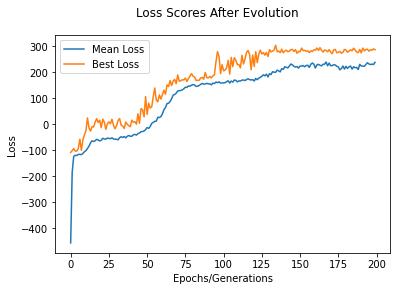

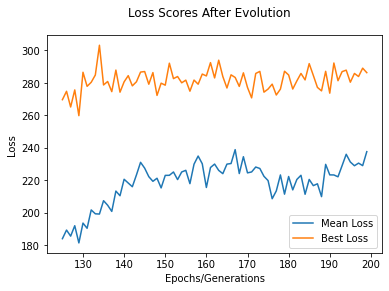

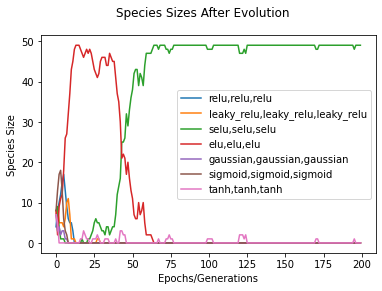

In [9]:
model.plot()
model.plot(starting_gen=125)
model.plot(plot_species=True)

### Best Model

In [18]:
# model.best_model retrieves the best model from the final generation
fitness_function([model.best_model], print_out=False)  # use print_out=True locally to view GUI

array([279.7746381])

### Final Generation

In [11]:
# model.best_model retrieves the best model from the final generation
fitness_function(model.last_gen, print_out=False)  # use print_out=True locally to view GUI

array([265.48146378, 177.63561099, 258.79774685, 236.94393656,
       261.07146578, 249.76384595, 249.60744536, 150.48176376,
       218.70341786, 249.862608  , 152.05291175, 194.50351497,
       225.90073225, 192.51653881, 262.10313134, 203.67090819,
       192.65212103, 219.32722024, 168.90425449, 160.35702893,
       224.34816442, 137.86664766, 254.56906942, 227.87435063,
       210.42562169, 187.12421296, 154.58525278, 109.0918647 ,
       217.48561838, 180.27891459, 247.86522301, 284.43805121,
       270.79351114, 175.09055631, 233.42804737,  68.18972884,
       168.30553326, 280.86488239,  74.28823385, 144.40331572,
       267.11043521, 162.83355537, 269.04354364, 256.67813345,
       265.03497906, 245.95321946,  64.77139357, 270.85159408,
       188.93049969, 181.38867213])

## Mixed Layers - Activations are different for all layers

After running just layers, the results show that the top three best activations were 'selu', 'elu', and 'tanh'. Now, we can refine our evolution by allowing the mixing of activations per layer from these best three in hopes to find a better model.

In [5]:
# define the choices for mixed layer activations
activation_function = ['selu', 'elu', 'tanh']

# define the model
model = ne.NeuroReinforcer(layer_nodes=layer_nodes, num_input=num_input, num_output=num_output,
                          fitness_function=fitness_function, population_size=population_size,
                          output_activation=output_activation, 
                          activation_function=activation_function)

model.evolve(max_epoch=max_epochs, verbose=True, warm_start=False, 
             just_layers=False, algorithm='speciation', prob_chnge_species=0.05)

Number of Trainable Parameters Per Network: 10801
Epoch 1/200
  Best Fit: -82.86374223819443 Mean Fit: -412.63402686248844
  Number of Species Present: 23
    Best Species by Top Fit: ['elu', 'selu', 'selu']
    Species: [elu,elu,selu] Count: 3
    Species: [elu,selu,selu] Count: 2
    Species: [elu,selu,tanh] Count: 3
    Species: [elu,tanh,elu] Count: 4
    Species: [elu,tanh,selu] Count: 2
    Species: [selu,elu,elu] Count: 1
    Species: [selu,elu,selu] Count: 3
    Species: [selu,elu,tanh] Count: 1
    Species: [selu,selu,elu] Count: 1
    Species: [selu,selu,selu] Count: 1
    Species: [selu,selu,tanh] Count: 2
    Species: [selu,tanh,elu] Count: 3
    Species: [selu,tanh,selu] Count: 2
    Species: [selu,tanh,tanh] Count: 1
    Species: [tanh,elu,elu] Count: 1
    Species: [tanh,elu,selu] Count: 2
    Species: [tanh,elu,tanh] Count: 4
    Species: [tanh,selu,elu] Count: 2
    Species: [tanh,selu,selu] Count: 1
    Species: [tanh,selu,tanh] Count: 2
    Species: [tanh,tanh,elu] C

Epoch 12/200
  Best Fit: 113.93389040818357 Mean Fit: 32.58057254957919
  Number of Species Present: 7
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,elu,selu] Count: 1
    Species: [selu,elu,selu] Count: 1
    Species: [selu,selu,tanh] Count: 12
    Species: [tanh,elu,selu] Count: 31
    Species: [tanh,elu,tanh] Count: 3
    Species: [tanh,selu,elu] Count: 1
    Species: [tanh,tanh,tanh] Count: 1
Epoch 13/200
  Best Fit: 104.25135328122249 Mean Fit: 50.58784215857815
  Number of Species Present: 5
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [selu,elu,selu] Count: 2
    Species: [selu,selu,tanh] Count: 11
    Species: [tanh,elu,selu] Count: 29
    Species: [tanh,elu,tanh] Count: 6
    Species: [tanh,tanh,tanh] Count: 2
     Change from Species ['tanh', 'elu', 'selu'] to Species ['selu', 'selu', 'elu']
     Change from Species ['tanh', 'elu', 'selu'] to Species ['elu', 'tanh', 'elu']
     Change from Species ['selu', 'selu', 'tanh'] to Speci

Epoch 27/200
  Best Fit: 134.64637846313548 Mean Fit: 109.70170745545704
  Number of Species Present: 5
    Best Species by Top Fit: ['tanh', 'elu', 'tanh']
    Species: [elu,tanh,tanh] Count: 3
    Species: [tanh,elu,selu] Count: 36
    Species: [tanh,elu,tanh] Count: 6
    Species: [tanh,selu,tanh] Count: 2
    Species: [tanh,tanh,selu] Count: 3
     Change from Species ['tanh', 'elu', 'selu'] to Species ['elu', 'elu', 'selu']
Epoch 28/200
  Best Fit: 145.414066483694 Mean Fit: 109.21374072424027
  Number of Species Present: 5
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,tanh,tanh] Count: 4
    Species: [tanh,elu,selu] Count: 36
    Species: [tanh,elu,tanh] Count: 6
    Species: [tanh,selu,tanh] Count: 2
    Species: [tanh,tanh,selu] Count: 2
     Change from Species ['tanh', 'elu', 'selu'] to Species ['elu', 'elu', 'elu']
     Change from Species ['tanh', 'elu', 'selu'] to Species ['elu', 'selu', 'selu']
     Change from Species ['tanh', 'elu', 'selu'] to S

Epoch 42/200
  Best Fit: 168.47835838302967 Mean Fit: 132.43017654396516
  Number of Species Present: 7
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,selu,tanh] Count: 1
    Species: [elu,tanh,selu] Count: 2
    Species: [elu,tanh,tanh] Count: 5
    Species: [selu,elu,elu] Count: 1
    Species: [selu,tanh,selu] Count: 3
    Species: [tanh,elu,selu] Count: 37
    Species: [tanh,elu,tanh] Count: 1
     Change from Species ['tanh', 'elu', 'selu'] to Species ['selu', 'elu', 'elu']
     Change from Species ['tanh', 'elu', 'selu'] to Species ['tanh', 'selu', 'elu']
Epoch 43/200
  Best Fit: 165.39227283728394 Mean Fit: 136.35059933489336
  Number of Species Present: 6
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,selu,tanh] Count: 1
    Species: [elu,tanh,tanh] Count: 4
    Species: [selu,elu,elu] Count: 1
    Species: [selu,tanh,selu] Count: 3
    Species: [tanh,elu,selu] Count: 40
    Species: [tanh,elu,tanh] Count: 1
     Change from Specie

Epoch 58/200
  Best Fit: 166.8618385243655 Mean Fit: 146.22945070207643
  Number of Species Present: 5
    Best Species by Top Fit: ['selu', 'elu', 'tanh']
    Species: [selu,elu,tanh] Count: 11
    Species: [selu,tanh,elu] Count: 2
    Species: [selu,tanh,tanh] Count: 1
    Species: [tanh,elu,selu] Count: 35
    Species: [tanh,tanh,selu] Count: 1
     Change from Species ['selu', 'elu', 'tanh'] to Species ['elu', 'elu', 'elu']
     Change from Species ['tanh', 'elu', 'selu'] to Species ['selu', 'selu', 'tanh']
Epoch 59/200
  Best Fit: 178.52532339656443 Mean Fit: 142.24054078557302
  Number of Species Present: 6
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [selu,elu,tanh] Count: 10
    Species: [selu,selu,tanh] Count: 1
    Species: [selu,tanh,elu] Count: 2
    Species: [selu,tanh,tanh] Count: 1
    Species: [tanh,elu,selu] Count: 35
    Species: [tanh,tanh,selu] Count: 1
     Change from Species ['tanh', 'elu', 'selu'] to Species ['elu', 'selu', 'elu']
     Chang

Epoch 71/200
  Best Fit: 173.92568692811912 Mean Fit: 152.85318570130931
  Number of Species Present: 7
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [selu,elu,tanh] Count: 1
    Species: [selu,tanh,elu] Count: 2
    Species: [selu,tanh,selu] Count: 2
    Species: [selu,tanh,tanh] Count: 1
    Species: [tanh,elu,elu] Count: 1
    Species: [tanh,elu,selu] Count: 36
    Species: [tanh,elu,tanh] Count: 7
     Change from Species ['tanh', 'elu', 'selu'] to Species ['selu', 'selu', 'tanh']
Epoch 72/200
  Best Fit: 174.78088064999986 Mean Fit: 149.62831255991003
  Number of Species Present: 6
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [selu,elu,tanh] Count: 1
    Species: [selu,tanh,elu] Count: 1
    Species: [selu,tanh,tanh] Count: 2
    Species: [tanh,elu,elu] Count: 2
    Species: [tanh,elu,selu] Count: 37
    Species: [tanh,elu,tanh] Count: 7
     Change from Species ['tanh', 'elu', 'selu'] to Species ['tanh', 'elu', 'elu']
     Change from Spec

Epoch 87/200
  Best Fit: 168.70571700856704 Mean Fit: 149.2892100363276
  Number of Species Present: 6
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,elu,tanh] Count: 3
    Species: [selu,elu,tanh] Count: 1
    Species: [selu,tanh,selu] Count: 1
    Species: [selu,tanh,tanh] Count: 2
    Species: [tanh,elu,selu] Count: 41
    Species: [tanh,elu,tanh] Count: 2
     Change from Species ['tanh', 'elu', 'selu'] to Species ['selu', 'tanh', 'elu']
     Change from Species ['tanh', 'elu', 'selu'] to Species ['elu', 'elu', 'selu']
     Change from Species ['tanh', 'elu', 'selu'] to Species ['tanh', 'selu', 'selu']
Epoch 88/200
  Best Fit: 179.64412894295504 Mean Fit: 151.61689570959018
  Number of Species Present: 7
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,elu,tanh] Count: 1
    Species: [selu,elu,tanh] Count: 1
    Species: [selu,tanh,selu] Count: 1
    Species: [selu,tanh,tanh] Count: 2
    Species: [tanh,elu,selu] Count: 41
    Species: 

Epoch 101/200
  Best Fit: 172.98088902640143 Mean Fit: 151.05088717797145
  Number of Species Present: 8
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,elu,selu] Count: 1
    Species: [elu,tanh,elu] Count: 6
    Species: [selu,elu,selu] Count: 1
    Species: [selu,tanh,selu] Count: 4
    Species: [tanh,elu,selu] Count: 26
    Species: [tanh,elu,tanh] Count: 8
    Species: [tanh,selu,selu] Count: 1
    Species: [tanh,tanh,elu] Count: 3
     Change from Species ['tanh', 'elu', 'selu'] to Species ['selu', 'selu', 'selu']
     Change from Species ['elu', 'tanh', 'elu'] to Species ['tanh', 'selu', 'tanh']
     Change from Species ['tanh', 'elu', 'tanh'] to Species ['selu', 'elu', 'tanh']
     Change from Species ['elu', 'tanh', 'elu'] to Species ['tanh', 'selu', 'selu']
Epoch 102/200
  Best Fit: 172.8690884515222 Mean Fit: 151.46180990037772
  Number of Species Present: 9
    Best Species by Top Fit: ['tanh', 'elu', 'selu']
    Species: [elu,elu,selu] Count: 2
    Sp

Epoch 113/200
  Best Fit: 186.4021226801138 Mean Fit: 153.79173374575163
  Number of Species Present: 11
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,elu,selu] Count: 4
    Species: [elu,tanh,elu] Count: 8
    Species: [elu,tanh,selu] Count: 1
    Species: [selu,tanh,elu] Count: 2
    Species: [tanh,elu,selu] Count: 4
    Species: [tanh,elu,tanh] Count: 4
    Species: [tanh,selu,selu] Count: 6
    Species: [tanh,selu,tanh] Count: 2
    Species: [tanh,tanh,elu] Count: 1
    Species: [tanh,tanh,selu] Count: 17
    Species: [tanh,tanh,tanh] Count: 1
     Change from Species ['elu', 'tanh', 'elu'] to Species ['elu', 'selu', 'elu']
Epoch 114/200
  Best Fit: 176.28910720466095 Mean Fit: 160.02786355899923
  Number of Species Present: 10
    Best Species by Top Fit: ['tanh', 'selu', 'selu']
    Species: [elu,elu,selu] Count: 4
    Species: [elu,tanh,elu] Count: 4
    Species: [elu,tanh,selu] Count: 1
    Species: [selu,tanh,elu] Count: 1
    Species: [tanh,elu,selu]

Epoch 126/200
  Best Fit: 177.7274167817767 Mean Fit: 161.5170489457202
  Number of Species Present: 7
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,elu,elu] Count: 1
    Species: [elu,elu,tanh] Count: 5
    Species: [elu,tanh,selu] Count: 2
    Species: [tanh,elu,selu] Count: 6
    Species: [tanh,selu,tanh] Count: 1
    Species: [tanh,tanh,elu] Count: 9
    Species: [tanh,tanh,selu] Count: 26
     Change from Species ['tanh', 'tanh', 'selu'] to Species ['tanh', 'elu', 'selu']
     Change from Species ['elu', 'elu', 'tanh'] to Species ['elu', 'selu', 'selu']
Epoch 127/200
  Best Fit: 181.0147611944007 Mean Fit: 163.18305817810096
  Number of Species Present: 7
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,elu,tanh] Count: 5
    Species: [elu,selu,selu] Count: 1
    Species: [elu,tanh,selu] Count: 2
    Species: [tanh,elu,selu] Count: 6
    Species: [tanh,selu,tanh] Count: 1
    Species: [tanh,tanh,elu] Count: 5
    Species: [tanh,tanh

Epoch 140/200
  Best Fit: 191.49403654867677 Mean Fit: 167.06774579245342
  Number of Species Present: 8
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,elu,selu] Count: 1
    Species: [elu,tanh,elu] Count: 1
    Species: [elu,tanh,selu] Count: 8
    Species: [tanh,elu,selu] Count: 1
    Species: [tanh,selu,elu] Count: 1
    Species: [tanh,selu,selu] Count: 2
    Species: [tanh,tanh,selu] Count: 34
    Species: [tanh,tanh,tanh] Count: 2
Epoch 141/200
  Best Fit: 186.07433360497288 Mean Fit: 163.45559545765857
  Number of Species Present: 7
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,elu,selu] Count: 3
    Species: [elu,tanh,elu] Count: 1
    Species: [elu,tanh,selu] Count: 7
    Species: [tanh,selu,elu] Count: 1
    Species: [tanh,selu,selu] Count: 2
    Species: [tanh,tanh,selu] Count: 34
    Species: [tanh,tanh,tanh] Count: 2
     Change from Species ['elu', 'elu', 'selu'] to Species ['tanh', 'tanh', 'selu']
     Change from Species

Epoch 155/200
  Best Fit: 181.67070027602415 Mean Fit: 165.13577720834445
  Number of Species Present: 4
    Best Species by Top Fit: ['elu', 'tanh', 'selu']
    Species: [elu,tanh,selu] Count: 9
    Species: [tanh,selu,selu] Count: 1
    Species: [tanh,tanh,elu] Count: 1
    Species: [tanh,tanh,selu] Count: 39
     Change from Species ['elu', 'tanh', 'selu'] to Species ['elu', 'selu', 'tanh']
     Change from Species ['tanh', 'tanh', 'selu'] to Species ['selu', 'tanh', 'elu']
     Change from Species ['tanh', 'tanh', 'selu'] to Species ['tanh', 'elu', 'tanh']
     Change from Species ['tanh', 'tanh', 'selu'] to Species ['tanh', 'tanh', 'elu']
Epoch 156/200
  Best Fit: 180.86165304840506 Mean Fit: 165.41622485406515
  Number of Species Present: 4
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,tanh,selu] Count: 9
    Species: [tanh,selu,selu] Count: 1
    Species: [tanh,tanh,elu] Count: 1
    Species: [tanh,tanh,selu] Count: 39
     Change from Species ['tanh', 

Epoch 170/200
  Best Fit: 185.26697017347536 Mean Fit: 167.61469236438927
  Number of Species Present: 4
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,selu,elu] Count: 2
    Species: [elu,tanh,selu] Count: 4
    Species: [tanh,tanh,selu] Count: 43
    Species: [tanh,tanh,tanh] Count: 1
     Change from Species ['elu', 'tanh', 'selu'] to Species ['tanh', 'selu', 'tanh']
Epoch 171/200
  Best Fit: 183.92139598898524 Mean Fit: 168.26933513522766
  Number of Species Present: 3
    Best Species by Top Fit: ['elu', 'selu', 'elu']
    Species: [elu,selu,elu] Count: 3
    Species: [elu,tanh,selu] Count: 2
    Species: [tanh,tanh,selu] Count: 45
Epoch 172/200
  Best Fit: 192.32167975455474 Mean Fit: 168.53814758370717
  Number of Species Present: 2
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,selu,elu] Count: 2
    Species: [tanh,tanh,selu] Count: 48
     Change from Species ['tanh', 'tanh', 'selu'] to Species ['elu', 'elu', 'elu']
Epoch 173/2

Epoch 187/200
  Best Fit: 196.06478063777567 Mean Fit: 172.04360339452185
  Number of Species Present: 5
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,tanh,tanh] Count: 1
    Species: [selu,tanh,elu] Count: 9
    Species: [selu,tanh,selu] Count: 4
    Species: [selu,tanh,tanh] Count: 1
    Species: [tanh,tanh,selu] Count: 35
     Change from Species ['selu', 'tanh', 'selu'] to Species ['elu', 'selu', 'tanh']
     Change from Species ['tanh', 'tanh', 'selu'] to Species ['selu', 'selu', 'elu']
Epoch 188/200
  Best Fit: 184.89836297674893 Mean Fit: 166.4763300934386
  Number of Species Present: 6
    Best Species by Top Fit: ['tanh', 'tanh', 'selu']
    Species: [elu,tanh,tanh] Count: 1
    Species: [selu,selu,elu] Count: 1
    Species: [selu,tanh,elu] Count: 11
    Species: [selu,tanh,selu] Count: 1
    Species: [selu,tanh,tanh] Count: 2
    Species: [tanh,tanh,selu] Count: 34
     Change from Species ['selu', 'tanh', 'elu'] to Species ['selu', 'tanh', 'tanh']
E

### How to Plot Results

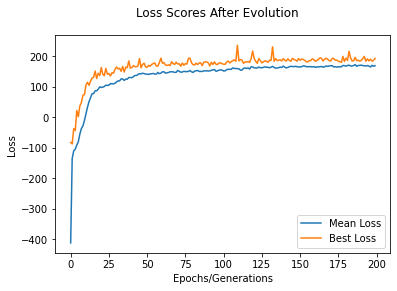

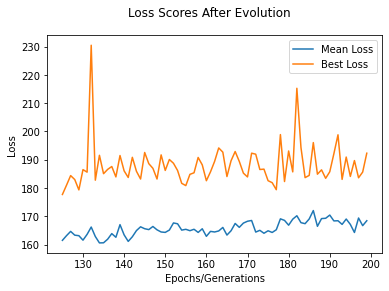

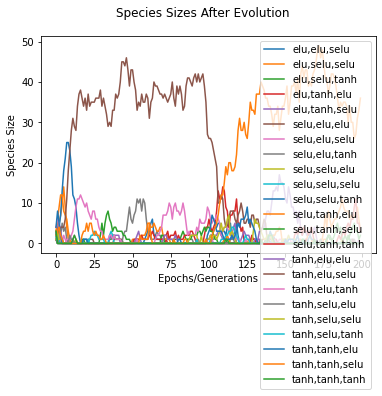

In [9]:
model.plot()
model.plot(starting_gen=125)
model.plot(plot_species=True)

## Best Model

In [7]:
# model.best_model retrieves the best model from the final generation
fitness_function([model.best_model], print_out=False)  # use print_out=True locally to view GUI

array([189.52957815])

## Final Generation

In [8]:
# model.best_model retrieves the best model from the final generation
fitness_function(model.last_gen, print_out=False)  # use print_out=True locally to view GUI

array([184.24685454, 128.30432382, 164.21189082, 171.21042858,
       180.16072943, 168.8583612 , 177.50021518, 166.39314575,
       152.34590201, 154.86314923, 150.33811511, 144.62085935,
       151.58242436, 163.34990451, 149.756212  , 151.36273011,
       162.1972604 , 162.87080913, 139.38677818, 155.89627898,
       157.85067435, 168.32057416, 166.74353763, 182.77437754,
       160.31324883, 164.02302729, 172.35544844, 153.71109625,
        84.73543779, 171.72112212, 161.97115284, 177.13518457,
       164.3088335 , 164.43488498, 137.24643983, 153.52911368,
       167.07004989, 148.58938511, 168.63889988, 157.50400288,
       159.37160261, 144.37820086, 179.53070019, 156.9504548 ,
       145.60219157, 131.68678742, 184.9008765 , 138.96770418,
       146.1653193 , 168.84636845])

# Final Comments

Mixing the function activations converged extremely quickly and begin to stall; however, complete layers fluctuated greatly with great increases but eventually stalled out. As we can see, mixing the activation functions was ineffective compared to keeping them whole. This may not be the case for all problems.